In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

In [6]:
#Download data
working_dataframe=pd.read_csv('final_dataframe.csv')

In [7]:
working_dataframe.head()

Borough Neighborhood   Latitude  Longitude  Number_of_Restaurants  \
0   Bronx    Wakefield  40.894705 -73.847201                      5   
1   Bronx   Co-op City  40.874294 -73.829939                      4   
2   Bronx  Eastchester  40.887556 -73.827806                     10   
3   Bronx    Fieldston  40.895437 -73.905643                      3   
4   Bronx    Riverdale  40.890834 -73.912585                     10   

  Top_Restaurant_Category  Number_of_HC_Facilities  Number_of_Banks  \
0     Sandwich Restaurant                        7                2   
1              Restaurant                        4                0   
2      Seafood Restaurant                        1                1   
3      Mexican Restaurant                        4                0   
4      Seafood Restaurant                        1                2   

   Number_of_Schools  Number_of_Bus_Stops  Number_of_Venues  Number_of_Events  \
0                  9                    0                69                 0   
1                  3                    2                35                 0   
2                  3                    4                42                 0   
3                  4                    1                32                 0   
4                  1                    1                51                 0   

   Daily_uber_rides  
0                 0  
1                 0  
2                 0  
3                 0  
4                22

In [8]:
#Drop features that we will not use for this clustering
model_data=working_dataframe.drop(['Borough', 'Neighborhood', 'Latitude', 'Longitude', 'Top_Restaurant_Category'], axis=1)

In [9]:
model_data

Number_of_Restaurants  Number_of_HC_Facilities  Number_of_Banks  \
0                        5                        7                2   
1                        4                        4                0   
2                       10                        1                1   
3                        3                        4                0   
4                       10                        1                2   
..                     ...                      ...              ...   
301                     61                        0                0   
302                     33                        0                0   
303                      0                        0                0   
304                     31                        0                0   
305                      2                        1                0   

     Number_of_Schools  Number_of_Bus_Stops  Number_of_Venues  \
0                    9                    0                69   
1                    3                    2                35   
2                    3                    4                42   
3                    4                    1                32   
4                    1                    1                51   
..                 ...                  ...               ...   
301                  0                    1               133   
302                  1                    2                80   
303                  0                    0                19   
304                  0                    0                75   
305                  1                    1                 7   

     Number_of_Events  Daily_uber_rides  
0                   0                 0  
1                   0                 0  
2                   0                 0  
3                   0                 0  
4                   0                22  
..                ...               ...  
301               100                20  
302                 0              1615  
303                 0                 1  
304                80                 0  
305                 0                53  

[306 rows x 8 columns]

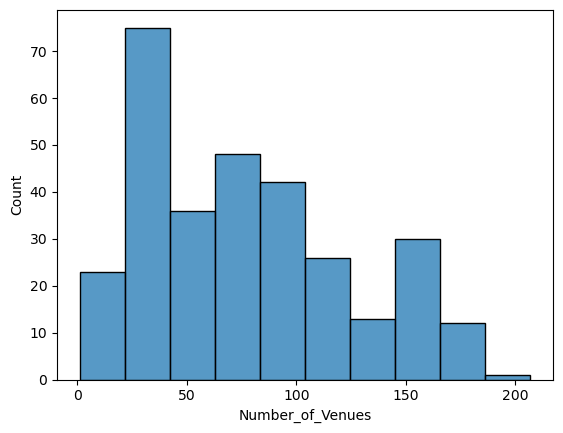

In [10]:
#Explore features distributions
sns.histplot(model_data["Number_of_Venues"])
plt.show()

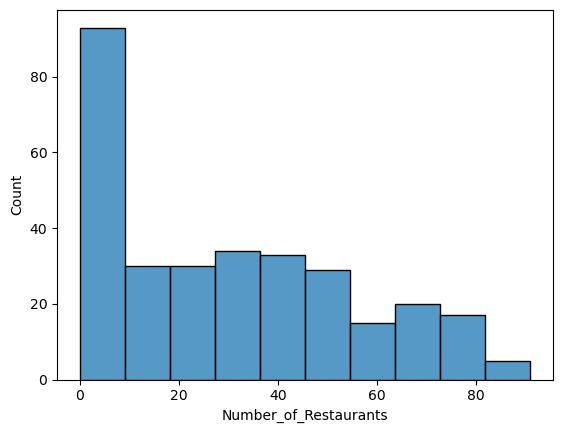

In [11]:
sns.histplot(model_data["Number_of_Restaurants"])
plt.show()

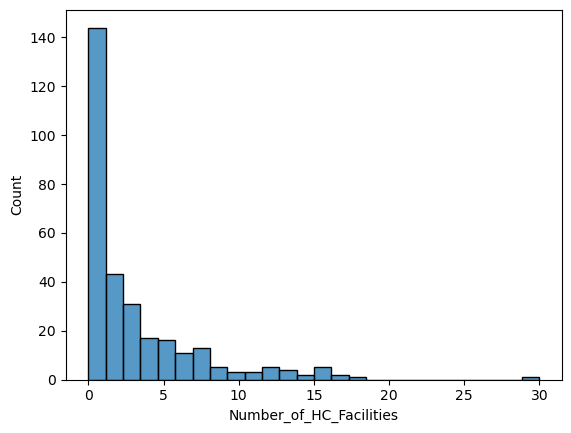

In [12]:
sns.histplot(model_data["Number_of_HC_Facilities"])
plt.show()

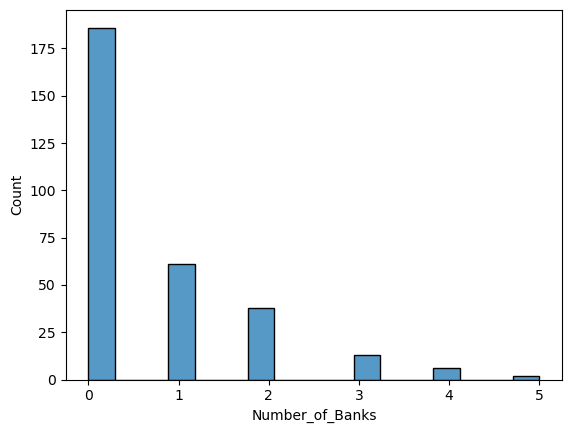

In [13]:
sns.histplot(model_data["Number_of_Banks"])
plt.show()

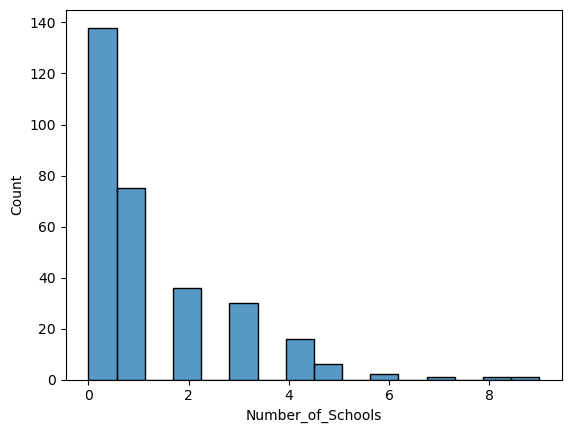

In [14]:
sns.histplot(model_data["Number_of_Schools"])
plt.show()

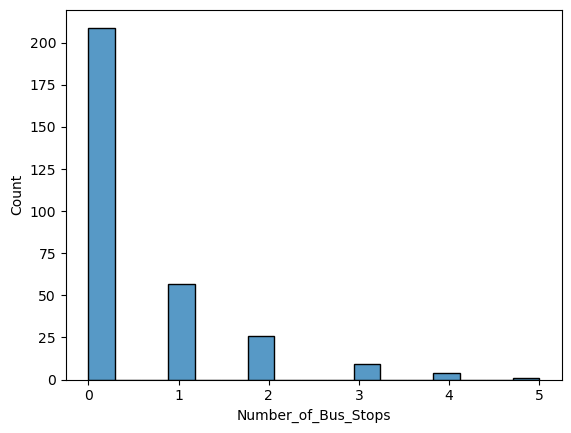

In [15]:
sns.histplot(model_data["Number_of_Bus_Stops"])
plt.show()

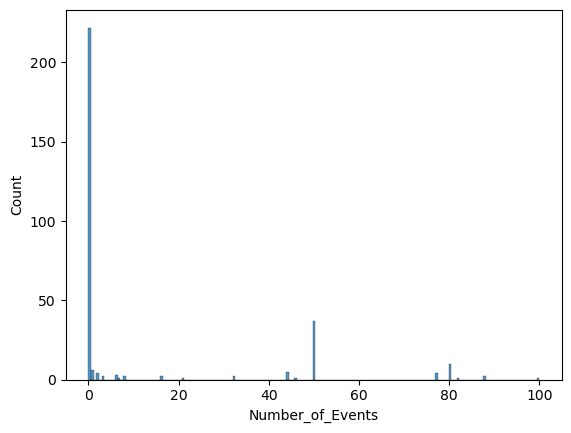

In [16]:
sns.histplot(model_data["Number_of_Events"])
plt.show()

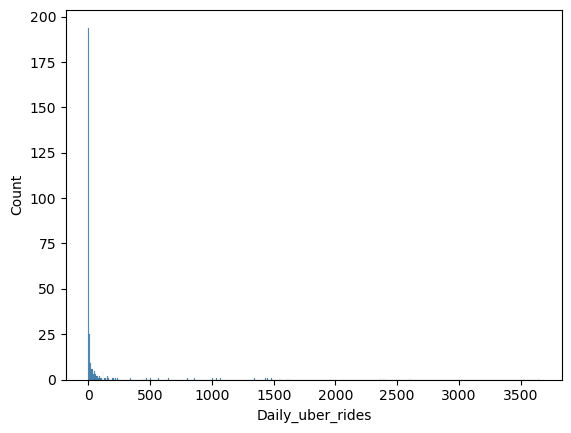

In [17]:
sns.histplot(model_data["Daily_uber_rides"])
plt.show()

Log transformation does not add much to improving the distribution because of small sample

In [26]:
#Scale the data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
model_data_scaled=scaler.fit_transform(model_data)

In [27]:
model_data_scaled

array([[-1.02611042,  0.93986588,  1.26145935, ..., -0.16799398,
        -0.50474255, -0.27202102],
       [-1.06664092,  0.21299404, -0.6589713 , ..., -0.8926247 ,
        -0.50474255, -0.27202102],
       [-0.82345792, -0.51387781,  0.30124402, ..., -0.74343602,
        -0.50474255, -0.27202102],
       ...,
       [-1.22876292, -0.75616842, -0.6589713 , ..., -1.2336274 ,
        -0.50474255, -0.26948982],
       [ 0.0276826 , -0.75616842, -0.6589713 , ..., -0.04011796,
         2.78145362, -0.27202102],
       [-1.14770192, -0.51387781, -0.6589713 , ..., -1.48937942,
        -0.50474255, -0.13786755]])

In [28]:
#Restore columns and dataframe
selected_columns = model_data.columns
model_data_scaled = pd.DataFrame(model_data_scaled, columns = selected_columns)

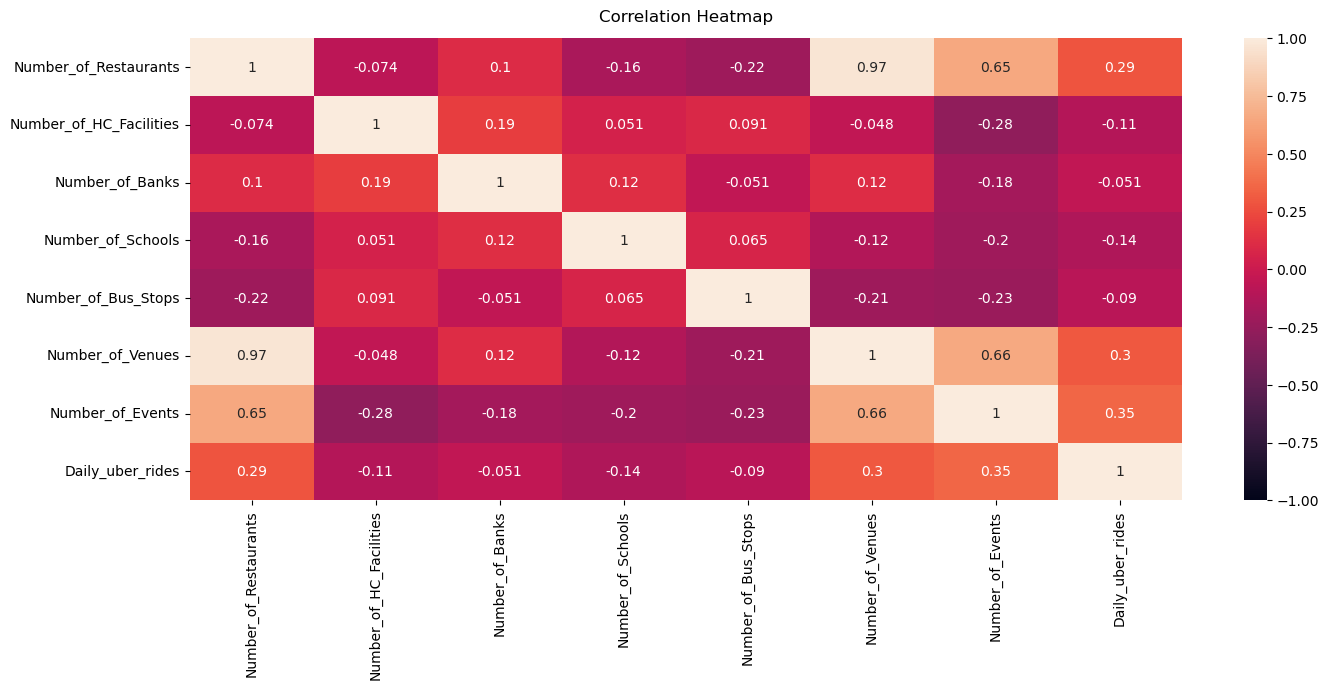

In [29]:
# Correlation heatmap to decide which features should be removed
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(model_data_scaled.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);
plt.show()

In [30]:
#Drop number of venues and keep number of restaurants as they are highly correlated
model_data_scaled=model_data_scaled.drop(['Number_of_Venues'], axis=1)
model_data_scaled

Number_of_Restaurants  Number_of_HC_Facilities  Number_of_Banks  \
0                -1.026110                 0.939866         1.261459   
1                -1.066641                 0.212994        -0.658971   
2                -0.823458                -0.513878         0.301244   
3                -1.107171                 0.212994        -0.658971   
4                -0.823458                -0.513878         1.261459   
..                     ...                      ...              ...   
301               1.243598                -0.756168        -0.658971   
302               0.108744                -0.756168        -0.658971   
303              -1.228763                -0.756168        -0.658971   
304               0.027683                -0.756168        -0.658971   
305              -1.147702                -0.513878        -0.658971   

     Number_of_Schools  Number_of_Bus_Stops  Number_of_Events  \
0             5.082441            -0.567127         -0.504743   
1             1.173198             1.643585         -0.504743   
2             1.173198             3.854297         -0.504743   
3             1.824739             0.538229         -0.504743   
4            -0.129882             0.538229         -0.504743   
..                 ...                  ...               ...   
301          -0.781423             0.538229          3.603003   
302          -0.129882             1.643585         -0.504743   
303          -0.781423            -0.567127         -0.504743   
304          -0.781423            -0.567127          2.781454   
305          -0.129882             0.538229         -0.504743   

     Daily_uber_rides  
0           -0.272021  
1           -0.272021  
2           -0.272021  
3           -0.272021  
4           -0.216335  
..                ...  
301         -0.221397  
302          3.815863  
303         -0.269490  
304         -0.272021  
305         -0.137868  

[306 rows x 7 columns]

In [31]:
#Implement Elbow Rule to define the number of clusters
def plot_distortion(model_data_scaled,max_clusters = 10):
    distortions = []
    for i in range(1, max_clusters +1):
        km = KMeans(n_clusters=i,
                    init='k-means++',
                    n_init=10,
                    random_state=0)
        km.fit(model_data_scaled)
        distortions.append(km.inertia_)

    plt.plot(range(1,max_clusters +1), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show() 

C:\Users\kravc\anaconda3\envs\lhl_bootcamp\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


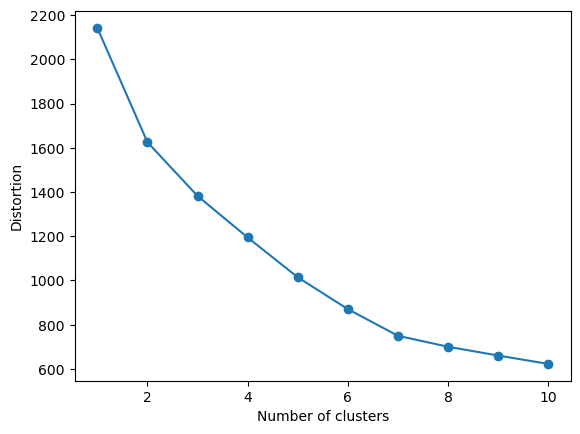

In [32]:
plot_distortion(model_data_scaled,max_clusters=10)

In [43]:
#Kmeans Clustering with defined number of Clusters
km = KMeans(n_clusters=5, # how many clusters we expected 
            n_init=10, # how many initial runs
            random_state=0)

In [44]:
y_km = km.fit_predict(model_data_scaled)

In [45]:
#Silhouette Score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = km.labels_
metrics.silhouette_score(model_data_scaled, labels, metric='euclidean')

0.29548698920103844

In [68]:
#Inertia
km_inertia=km.inertia_
km_inertia

1014.1367186750257

In [46]:
#Function to plot clusters
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

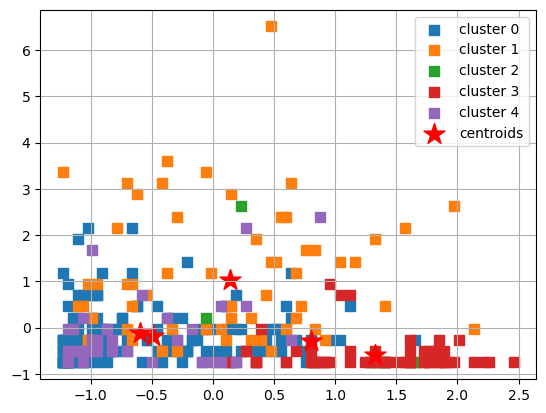

In [47]:
#Plot clusters with y_km 
plot_clusters(model_data_scaled.values, y_km, plt_cluster_centers= True)


In [48]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import numpy as np
 
#Load Data
data = model_data_scaled
pca = PCA(2)
 
#Transform the data
df = pca.fit_transform(data)
 
df.shape

(306, 2)

In [49]:
#Initialize the class object
kmeans = KMeans(n_clusters= 6)
 
#predict the labels of clusters.
label = kmeans.fit_predict(df)
 
print(label)

[4 2 2 2 5 0 4 5 4 5 5 4 0 5 5 5 4 0 2 0 2 0 2 0 5 5 2 2 5 5 5 5 2 5 4 0 4
 4 5 2 5 0 2 0 0 2 4 0 4 1 0 4 0 4 5 0 2 1 0 1 5 1 0 0 1 1 1 2 1 1 1 0 2 2
 5 2 2 2 2 4 4 2 2 2 1 2 1 1 1 2 5 2 0 1 4 0 1 1 2 4 1 4 0 0 0 0 1 1 1 1 1
 1 1 3 1 1 1 3 1 1 1 1 1 3 3 1 1 1 3 0 1 0 0 0 0 5 5 5 0 0 2 0 0 4 2 0 5 4
 0 0 5 0 0 5 0 5 0 5 2 2 0 4 4 2 2 2 5 2 2 2 5 2 2 0 0 5 2 2 0 2 4 5 5 5 4
 5 0 5 5 0 0 5 2 2 2 0 0 2 2 5 2 4 2 2 5 2 2 2 5 2 2 5 2 2 4 2 2 2 2 2 0 1
 5 0 2 0 2 2 2 2 5 5 2 2 2 2 5 2 2 2 2 2 2 2 2 2 2 1 3 3 3 0 2 2 2 2 2 2 2
 5 5 2 0 0 2 2 2 2 0 0 0 1 3 3 3 1 3 3 2 1 1 0 2 1 2 2 2 2 2 4 5 5 2 5 2 2
 5 5 2 5 1 1 1 2 1 2]


In [50]:
metrics.silhouette_score(model_data_scaled, kmeans.labels_, metric='euclidean')

0.15086527936611463

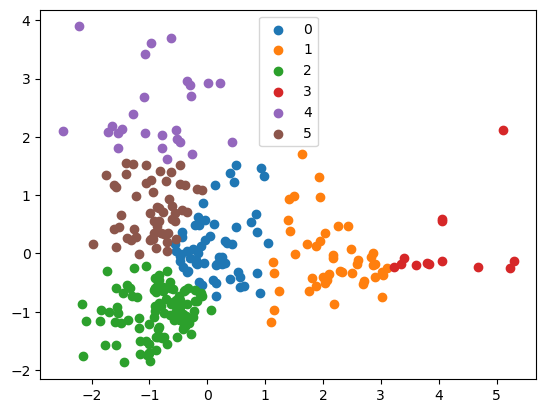

In [52]:
#Getting unique labels for Kmeas after PCA
 
u_labels = np.unique(label)
 
#Plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

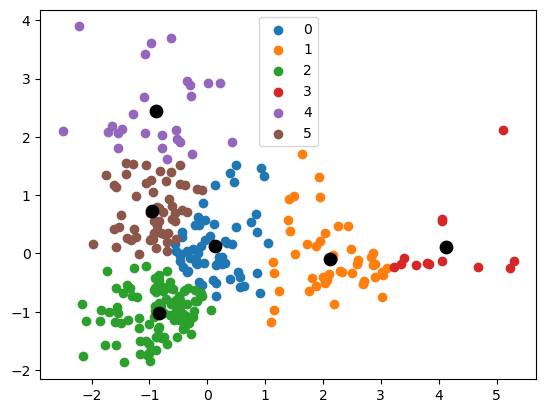

In [53]:
#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.scatter(centroids[:,0] , centroids[:,1] , s = 80, color = 'k')
plt.legend()
plt.show()

In [55]:
#Let us visualize clusters with PCA
#PCA -set up
from sklearn.decomposition import PCA

X = model_data_scaled

pca_nbhoods = PCA(n_components=6)
components = pca_nbhoods.fit_transform(X)
#fig = px.scatter(components, x=0, y=1, color=y)
#fig.show()

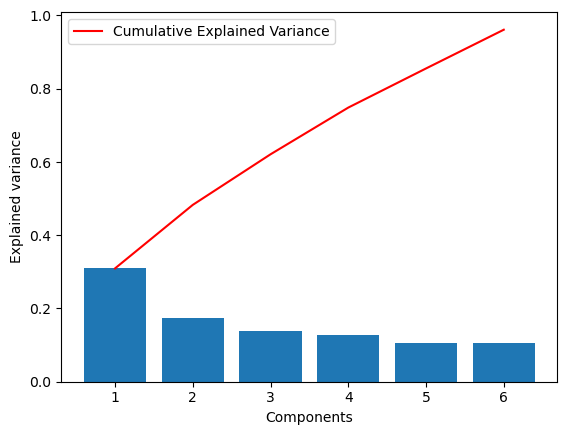

In [56]:
#PCA - define the number of components
plt.bar(range(1,len(pca_nbhoods.explained_variance_ratio_)+1),pca_nbhoods.explained_variance_ratio_)
plt.ylabel('Explained variance')
plt.xlabel('Components')
plt.plot(range(1,len(pca_nbhoods.explained_variance_ratio_ )+1),
         np.cumsum(pca_nbhoods.explained_variance_ratio_),
         c='red',
         label="Cumulative Explained Variance")
plt.legend(loc='upper left')
plt.show()

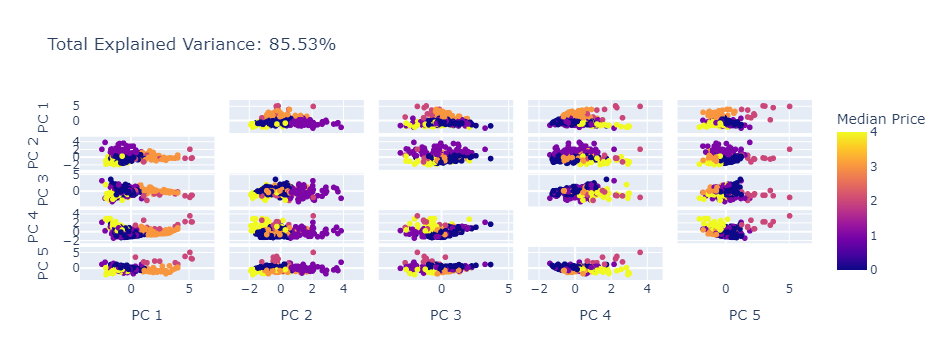

In [57]:
#Visualize PCA with 5 components
n_components = 5

pca = PCA(n_components=n_components)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

labels = {str(i): f"PC {i+1}" for i in range(n_components)}
labels['color'] = 'Median Price'

fig = px.scatter_matrix(
    components,
    color=y_km,
    dimensions=range(n_components),
    labels=labels,
    title=f'Total Explained Variance: {total_var:.2f}%',
)
fig.update_traces(diagonal_visible=False)
fig.show()

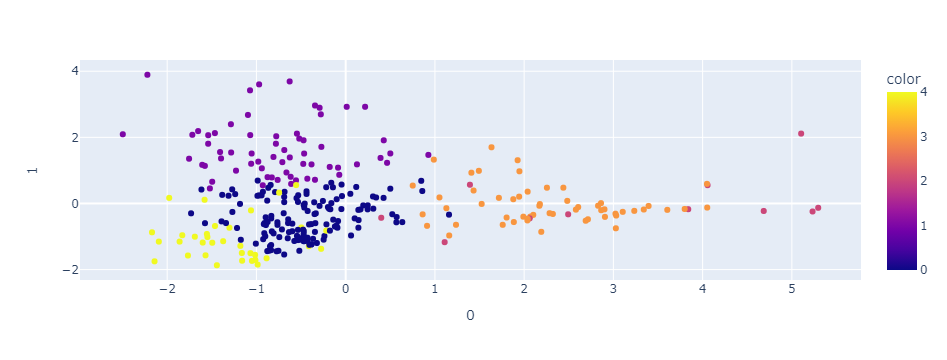

In [59]:
# 2D Scatter Plot
X = model_data_scaled

pca_nbhoods = PCA(n_components=2)
components = pca_nbhoods.fit_transform(X)
fig = px.scatter(components, x=0, y=1, color=y_km)
fig.show()

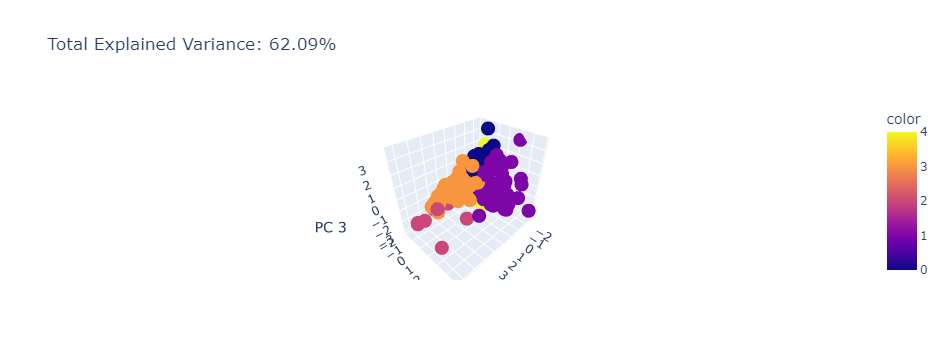

In [60]:
#3D Scatter Plot

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=y_km,
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'PC 1', '1': 'PC 2', '2': 'PC 3'}
)
fig.show()

In [ ]:
#Hirachical clustering

In [61]:
#Explore the Dendrogram
from sklearn.cluster import AgglomerativeClustering

import scipy.cluster.hierarchy as sch

# set figure size
plt.rcParams["figure.figsize"] = (12,8)

In [62]:
#Plot dendrogram 
def plot_dendrogram(X,method ='ward'):
    dendrogram = sch.dendrogram(sch.linkage(X, method=method))
    plt.title("Dendrogram")
    plt.ylabel("Euclidean distances")
    plt.xlabel('Points')
    plt.show()

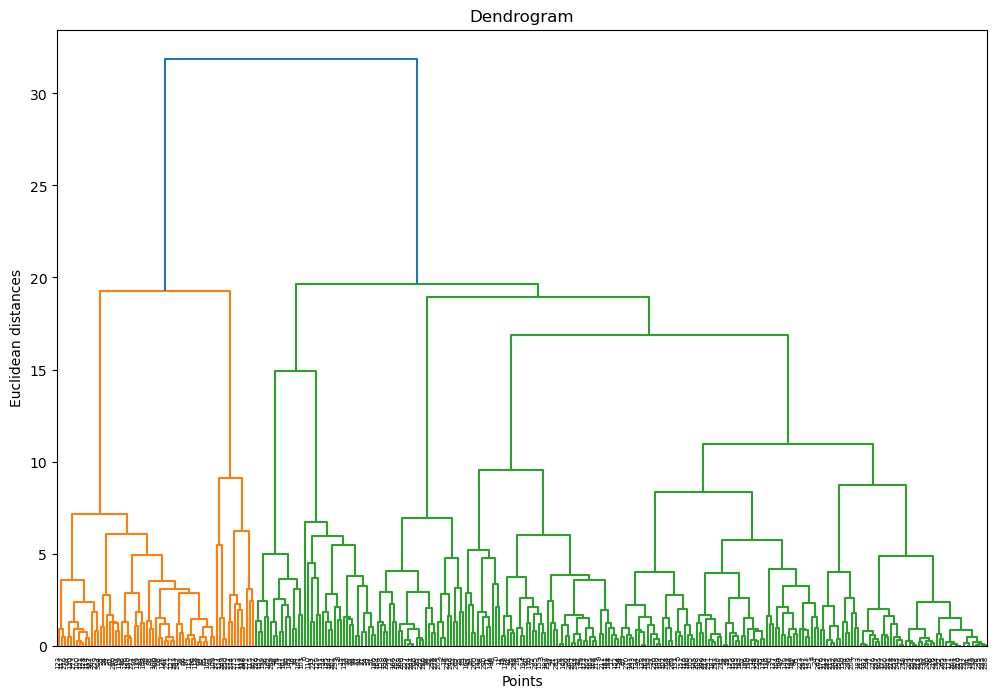

In [64]:
plot_dendrogram(model_data_scaled)

In [65]:
# Object for Hierarchical Clustering
ac = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)

In [67]:
y_hc = ac.fit_predict(model_data_scaled)
y_hc

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,

In [69]:
#Silhouette Score
from sklearn import metrics
from sklearn.metrics import pairwise_distances
labels = ac.labels_
metrics.silhouette_score(model_data_scaled, labels, metric='euclidean')

0.32470543051705564

In [71]:
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

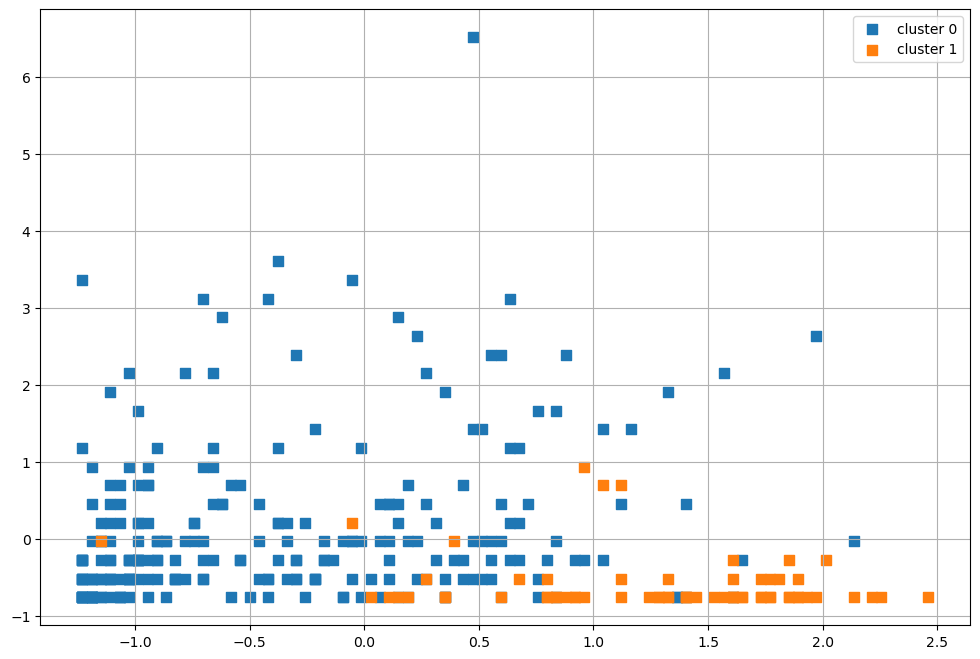

In [72]:
plot_clusters(model_data_scaled.values,y_hc)

In [73]:
#Hierarchical Clustering with PCA
hierarch = AgglomerativeClustering(affinity='euclidean',
                             linkage='ward',
                             n_clusters = 2)
 
#predict the labels of clusters.
label_hierarch = hierarch.fit_predict(df)
 
print(label_hierarch)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0
 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 0 0 1 0]


In [74]:
#Silhouette Score

labels = hierarch.labels_
metrics.silhouette_score(model_data_scaled, labels, metric='euclidean')

0.3312369330877747

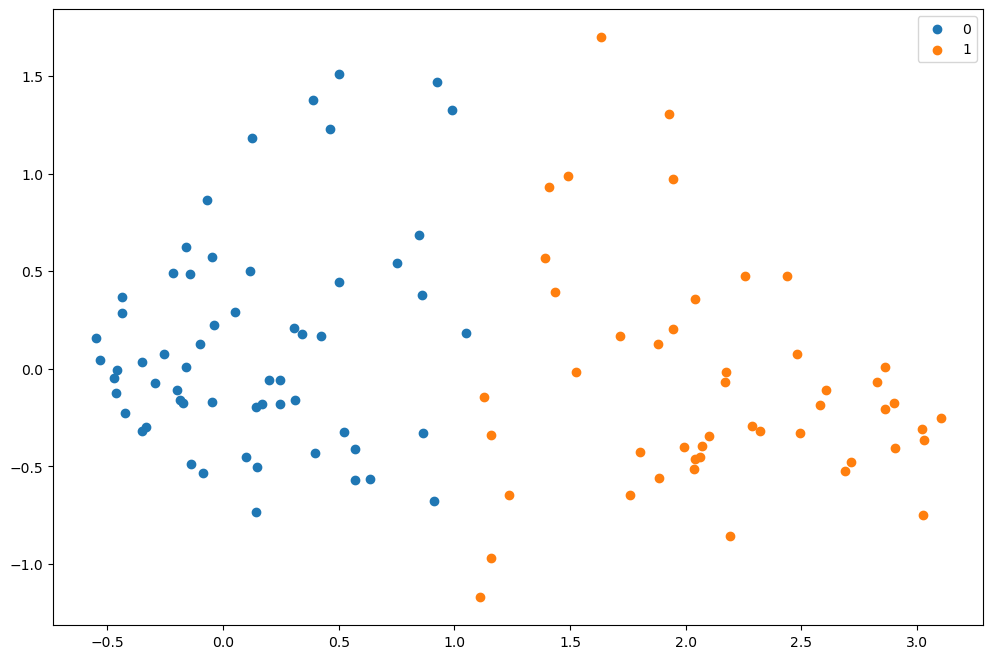

In [75]:
#Getting unique labels
 
u_labels = np.unique(label_hierarch)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(df[label == i , 0] , df[label == i , 1] , label = i)
plt.legend()
plt.show()

In [ ]:
#DBScan

In [76]:
db = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')

In [83]:
y_db = db.fit_predict(X)


In [78]:
X.shape

(306, 7)

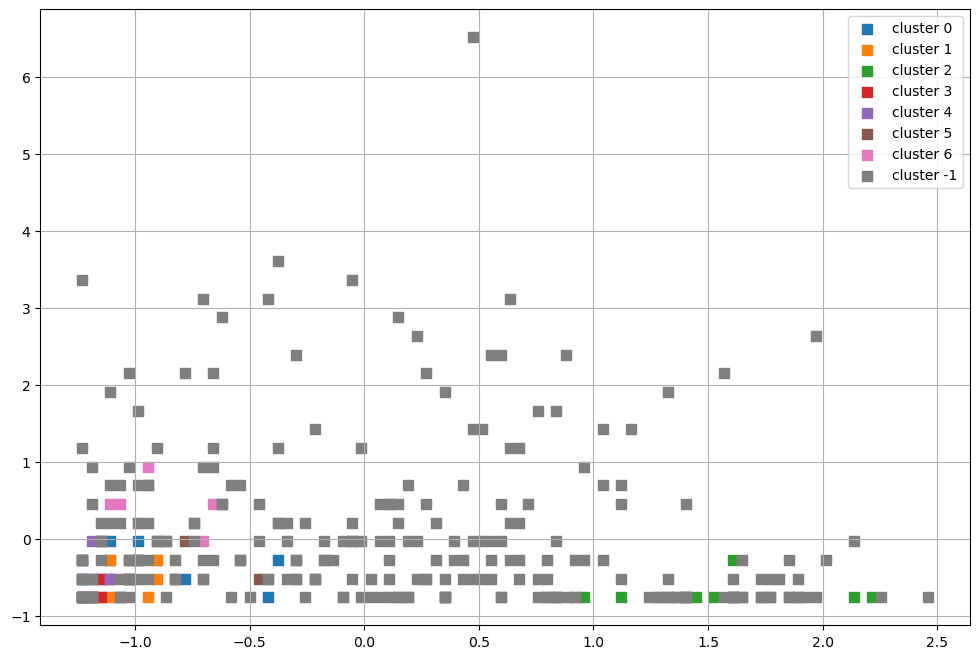

In [79]:
plot_clusters(X.values,y_db)

In [80]:
#Silhouette Score

labels = hierarch.labels_
metrics.silhouette_score(model_data_scaled, labels, metric='euclidean')

0.3312369330877747

In [84]:
#DBSCAN after PCA
dbscan = DBSCAN(eps=0.5,
            min_samples=5,
            metric='euclidean')
 
#predict the labels of clusters.
label_db = dbscan.fit_predict(df)
 
print(label_db)

[-1  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0 -1  0
  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0
  0  0  0  0  0  0  0  1 -1  0  0  0 -1  0 -1  0  0  0  0  0  0 -1  0  0
  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0 -1  0  0  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0  1
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0 -1 -1  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1  0 -1  0  0 -1  0  0  0  0  0  0  0  0  0  0
  0 -1  0  0  0  0  0  0  0  0  0  0  0  0 -1  0  0  0]


In [85]:
#Silhouette Score
labels = dbscan.labels_
metrics.silhouette_score(model_data_scaled, labels, metric='euclidean')

0.22568932915087622

In [87]:
#Get Clusters for each observation
cluster_map = pd.DataFrame()
cluster_map['data_index'] = model_data_scaled.index.values
cluster_map['cluster'] = km.labels_

cluster_map

data_index  cluster
0             0        1
1             1        4
2             2        4
3             3        0
4             4        0
..          ...      ...
301         301        3
302         302        2
303         303        0
304         304        3
305         305        0

[306 rows x 2 columns]

In [92]:
#Add cluster column to model_data to analyse clusters
model_data['Cluster']=cluster_map['cluster']

In [93]:
#Add cluster column to working dataframe
working_dataframe['Cluster']=cluster_map['cluster']

In [123]:
#Write new dataframe to file to share with team
working_dataframe.to_csv('final_dataframe_all_numeric_5clusters.csv', index=False)

In [95]:
#This is the DataFrame for discriptive cluster analysis
model_data

Number_of_Restaurants  Number_of_HC_Facilities  Number_of_Banks  \
0                        5                        7                2   
1                        4                        4                0   
2                       10                        1                1   
3                        3                        4                0   
4                       10                        1                2   
..                     ...                      ...              ...   
301                     61                        0                0   
302                     33                        0                0   
303                      0                        0                0   
304                     31                        0                0   
305                      2                        1                0   

     Number_of_Schools  Number_of_Bus_Stops  Number_of_Venues  \
0                    9                    0                69   
1                    3                    2                35   
2                    3                    4                42   
3                    4                    1                32   
4                    1                    1                51   
..                 ...                  ...               ...   
301                  0                    1               133   
302                  1                    2                80   
303                  0                    0                19   
304                  0                    0                75   
305                  1                    1                 7   

     Number_of_Events  Daily_uber_rides  Cluster  
0                   0                 0        1  
1                   0                 0        4  
2                   0                 0        4  
3                   0                 0        0  
4                   0                22        0  
..                ...               ...      ...  
301               100                20        3  
302                 0              1615        2  
303                 0                 1        0  
304                80                 0        3  
305                 0                53        0  

[306 rows x 9 columns]

In [96]:
df_cluster_0=model_data.loc[model_data.Cluster==0]

In [97]:
df_cluster_0.describe() 

Number_of_Restaurants  Number_of_HC_Facilities  Number_of_Banks  \
count             142.000000               142.000000       142.000000   
mean               18.225352                 2.380282         0.288732   
std                17.767767                 2.471777         0.499375   
min                 0.000000                 0.000000         0.000000   
25%                 3.000000                 1.000000         0.000000   
50%                12.000000                 2.000000         0.000000   
75%                30.750000                 3.000000         1.000000   
max                71.000000                12.000000         2.000000   

       Number_of_Schools  Number_of_Bus_Stops  Number_of_Venues  \
count         142.000000           142.000000        142.000000   
mean            1.232394             0.232394         53.507042   
std             1.466725             0.423854         33.184579   
min             0.000000             0.000000          1.000000   
25%             0.000000             0.000000         25.000000   
50%             1.000000             0.000000         47.000000   
75%             2.000000             0.000000         75.750000   
max             8.000000             1.000000        168.000000   

       Number_of_Events  Daily_uber_rides  Cluster  
count        142.000000        142.000000    142.0  
mean           0.380282         11.795775      0.0  
std            2.037703         33.319544      0.0  
min            0.000000          0.000000      0.0  
25%            0.000000          0.000000      0.0  
50%            0.000000          1.500000      0.0  
75%            0.000000          6.000000      0.0  
max           21.000000        218.000000      0.0

In [98]:
df_cluster_1=model_data.loc[model_data.Cluster==1]
df_cluster_1.describe()

Number_of_Restaurants  Number_of_HC_Facilities  Number_of_Banks  \
count              63.000000                63.000000        63.000000   
mean               33.825397                 7.396825         2.142857   
std                20.219393                 5.829678         1.175793   
min                 0.000000                 0.000000         0.000000   
25%                16.000000                 3.000000         2.000000   
50%                34.000000                 6.000000         2.000000   
75%                46.500000                11.000000         3.000000   
max                83.000000                30.000000         5.000000   

       Number_of_Schools  Number_of_Bus_Stops  Number_of_Venues  \
count          63.000000            63.000000         63.000000   
mean            1.603175             0.412698         83.730159   
std             1.879771             0.612634         39.211670   
min             0.000000             0.000000         25.000000   
25%             0.000000             0.000000         54.500000   
50%             1.000000             0.000000         84.000000   
75%             3.000000             1.000000        103.000000   
max             9.000000             2.000000        207.000000   

       Number_of_Events  Daily_uber_rides  Cluster  
count         63.000000         63.000000     63.0  
mean           0.888889         22.301587      1.0  
std            3.152629         94.497762      0.0  
min            0.000000          0.000000      1.0  
25%            0.000000          0.000000      1.0  
50%            0.000000          2.000000      1.0  
75%            0.000000          7.000000      1.0  
max           16.000000        572.000000      1.0

In [99]:
df_cluster_2=model_data.loc[model_data.Cluster==2]
df_cluster_2.describe()

Number_of_Restaurants  Number_of_HC_Facilities  Number_of_Banks  \
count              11.000000                11.000000        11.000000   
mean               50.181818                 1.909091         0.363636   
std                22.471396                 4.253341         0.924416   
min                 2.000000                 0.000000         0.000000   
25%                34.500000                 0.000000         0.000000   
50%                62.000000                 0.000000         0.000000   
75%                67.500000                 1.500000         0.000000   
max                71.000000                14.000000         3.000000   

       Number_of_Schools  Number_of_Bus_Stops  Number_of_Venues  \
count          11.000000            11.000000         11.000000   
mean            0.454545             0.272727        117.454545   
std             0.934199             0.646670         45.288770   
min             0.000000             0.000000         22.000000   
25%             0.000000             0.000000         88.500000   
50%             0.000000             0.000000        118.000000   
75%             0.500000             0.000000        155.000000   
max             3.000000             2.000000        168.000000   

       Number_of_Events  Daily_uber_rides  Cluster  
count         11.000000         11.000000     11.0  
mean          42.636364       1901.818182      2.0  
std           31.235469        766.014989      0.0  
min            0.000000       1038.000000      2.0  
25%           16.000000       1440.500000      2.0  
50%           50.000000       1552.000000      2.0  
75%           63.500000       2378.500000      2.0  
max           80.000000       3651.000000      2.0

In [100]:
df_cluster_3=model_data.loc[model_data.Cluster==3]
df_cluster_3.describe()

Number_of_Restaurants  Number_of_HC_Facilities  Number_of_Banks  \
count              55.000000                55.000000        55.000000   
mean               62.981818                 0.690909         0.309091   
std                14.886597                 1.525981         0.604695   
min                31.000000                 0.000000         0.000000   
25%                52.500000                 0.000000         0.000000   
50%                65.000000                 0.000000         0.000000   
75%                74.500000                 1.000000         0.000000   
max                91.000000                 7.000000         2.000000   

       Number_of_Schools  Number_of_Bus_Stops  Number_of_Venues  \
count          55.000000            55.000000         55.000000   
mean            0.672727             0.090909        139.545455   
std             1.106455             0.290129         27.176255   
min             0.000000             0.000000         75.000000   
25%             0.000000             0.000000        119.500000   
50%             0.000000             0.000000        150.000000   
75%             1.000000             0.000000        162.500000   
max             4.000000             1.000000        169.000000   

       Number_of_Events  Daily_uber_rides  Cluster  
count         55.000000         55.000000     55.0  
mean          57.763636        145.254545      3.0  
std           15.518166        253.665880      0.0  
min           32.000000          0.000000      3.0  
25%           50.000000          9.000000      3.0  
50%           50.000000         47.000000      3.0  
75%           77.000000        117.500000      3.0  
max          100.000000       1068.000000      3.0

In [102]:
df_cluster_4=model_data.loc[model_data.Cluster==4]
df_cluster_4.describe()

Number_of_Restaurants  Number_of_HC_Facilities  Number_of_Banks  \
count              35.000000                35.000000        35.000000   
mean               15.485714                 2.628571         0.371429   
std                14.490101                 3.245682         0.645606   
min                 1.000000                 0.000000         0.000000   
25%                 4.000000                 1.000000         0.000000   
50%                 9.000000                 2.000000         0.000000   
75%                27.000000                 3.000000         1.000000   
max                52.000000                13.000000         2.000000   

       Number_of_Schools  Number_of_Bus_Stops  Number_of_Venues  \
count           35.00000            35.000000         35.000000   
mean             1.40000             2.571429         48.171429   
std              1.63059             0.814779         23.767855   
min              0.00000             2.000000         18.000000   
25%              0.00000             2.000000         30.500000   
50%              1.00000             2.000000         42.000000   
75%              2.50000             3.000000         66.500000   
max              7.00000             5.000000         98.000000   

       Number_of_Events  Daily_uber_rides  Cluster  
count         35.000000         35.000000     35.0  
mean           0.114286         25.600000      4.0  
std            0.403764         80.701046      0.0  
min            0.000000          0.000000      4.0  
25%            0.000000          0.000000      4.0  
50%            0.000000          1.000000      4.0  
75%            0.000000          6.000000      4.0  
max            2.000000        447.000000      4.0

In [103]:
#Normalize cluster subframes with min-max scaler
from numpy import asarray
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

scaled_cluster_0 = scaler.fit_transform(df_cluster_0)
scaled_cluster_1 = scaler.fit_transform(df_cluster_1)
scaled_cluster_2 = scaler.fit_transform(df_cluster_2)
scaled_cluster_3 = scaler.fit_transform(df_cluster_3)
scaled_cluster_4 = scaler.fit_transform(df_cluster_4)

                                     

In [104]:
#Return into DataFrame with column names
selected_columns0 = df_cluster_0.columns
df_scaled_cluster_0 = pd.DataFrame(scaled_cluster_0, columns = selected_columns0)
df_scaled_cluster_1 = pd.DataFrame(scaled_cluster_1, columns = selected_columns0)
df_scaled_cluster_2 = pd.DataFrame(scaled_cluster_2, columns = selected_columns0)
df_scaled_cluster_3 = pd.DataFrame(scaled_cluster_3, columns = selected_columns0)
df_scaled_cluster_4 = pd.DataFrame(scaled_cluster_4, columns = selected_columns0)


In [110]:
#Prepare data for radar plots
df_cluster_0_mean=df_scaled_cluster_0.mean()
radar0=df_cluster_0_mean.to_dict()
radar0_list=list(radar0.values())
radar0_list

[0.2566951001785361,
 0.19835680751173704,
 0.1443661971830986,
 0.15404929577464788,
 0.2323943661971831,
 0.31441342666779126,
 0.018108651911468807,
 0.05410905801783172,
 0.0]

In [111]:
df_cluster_1_mean=df_scaled_cluster_1.mean()
radar1=df_cluster_1_mean.to_dict()
radar1_list=list(radar1.values())
radar1_list

[0.407534901510805,
 0.24656084656084637,
 0.4285714285714283,
 0.17813051146384473,
 0.20634920634920634,
 0.32269317983603707,
 0.05555555555555555,
 0.03898878898878897,
 0.0]

In [112]:
df_cluster_2_mean=df_scaled_cluster_2.mean()
radar2=df_cluster_2_mean.to_dict()
radar2_list=list(radar2.values())
radar2_list

[0.6982872200263505,
 0.13636363636363635,
 0.1212121212121212,
 0.1515151515151515,
 0.13636363636363635,
 0.6537982565379825,
 0.5329545454545456,
 0.33058483804752464,
 0.0]

In [113]:
df_cluster_3_mean=df_scaled_cluster_3.mean()
radar3=df_cluster_3_mean.to_dict()
radar3_list=list(radar3.values())
radar3_list

[0.533030303030303,
 0.0987012987012987,
 0.15454545454545454,
 0.16818181818181818,
 0.09090909090909091,
 0.6866537717601546,
 0.3788770053475936,
 0.1360061287027579,
 0.0]

In [114]:
df_cluster_4_mean=df_scaled_cluster_4.mean()
radar4=df_cluster_4_mean.to_dict()
radar4_list=list(radar4.values())
radar4_list

[0.2840336134453781,
 0.2021978021978022,
 0.18571428571428572,
 0.20000000000000004,
 0.1904761904761905,
 0.3771428571428571,
 0.05714285714285714,
 0.05727069351230425,
 0.0]

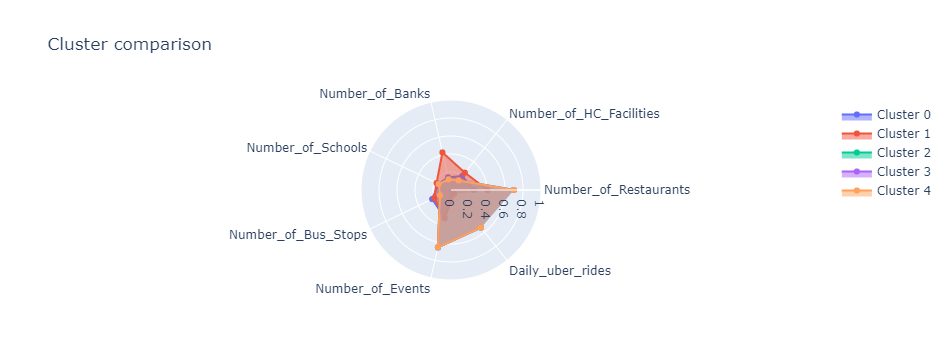

In [117]:
#Visualize clusters on Radar Chart
import plotly.graph_objects as go

categories = ['Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools',
 'Number_of_Bus_Stops','Number_of_Events', 'Daily_uber_rides']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=radar0_list,
      theta=categories,
      fill='toself',
      name='Cluster 0'
))
fig.add_trace(go.Scatterpolar(
      r=radar1_list,
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.add_trace(go.Scatterpolar(
      r=radar2_list,
      theta=categories,
      fill='toself',
      name='Cluster 2'
))
fig.add_trace(go.Scatterpolar(
      r=radar2_list,
      theta=categories,
      fill='toself',
      name='Cluster 3'
))
fig.add_trace(go.Scatterpolar(
      r=radar2_list,
      theta=categories,
      fill='toself',
      name='Cluster 4'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,1]
    )),
  showlegend=True,
  title=go.layout.Title(text='Cluster comparison')
)

fig.show()

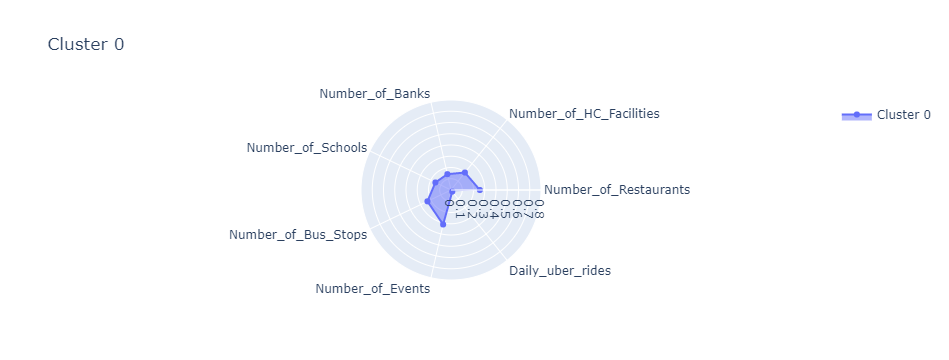

In [118]:
#Cluster 0 radar chart
categories = ['Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools',
 'Number_of_Bus_Stops','Number_of_Events', 'Daily_uber_rides']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=radar0_list,
      theta=categories,
      fill='toself',
      name='Cluster 0'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,0.8]
    )),
  showlegend=True,
  title=go.layout.Title(text='Cluster 0'))

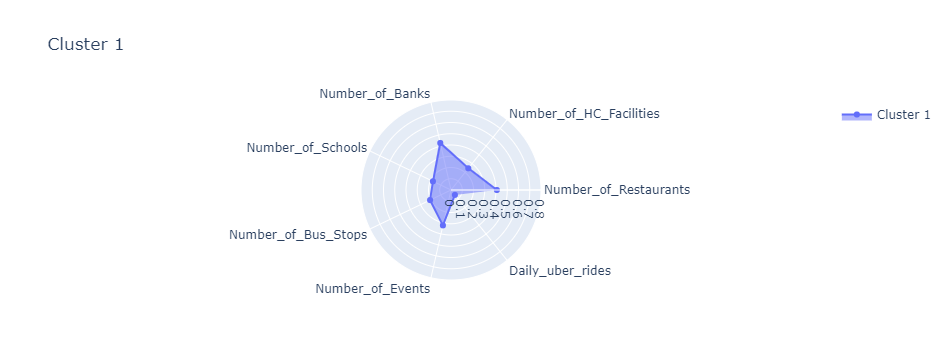

In [119]:
#Cluster 1 radar chart
categories = ['Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools',
 'Number_of_Bus_Stops','Number_of_Events', 'Daily_uber_rides']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=radar1_list,
      theta=categories,
      fill='toself',
      name='Cluster 1'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,0.8]
    )),
  showlegend=True,
  title=go.layout.Title(text='Cluster 1'))

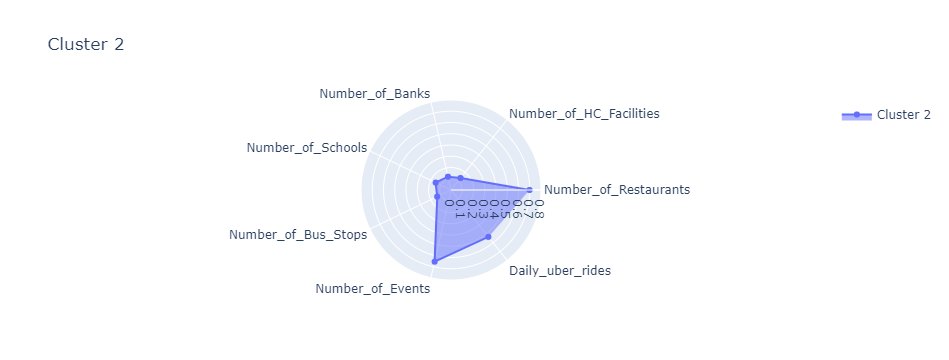

In [120]:
#Cluster 2 radar chart
categories = ['Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools',
 'Number_of_Bus_Stops','Number_of_Events', 'Daily_uber_rides']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=radar2_list,
      theta=categories,
      fill='toself',
      name='Cluster 2'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,0.8]
    )),
  showlegend=True,
  title=go.layout.Title(text='Cluster 2'))

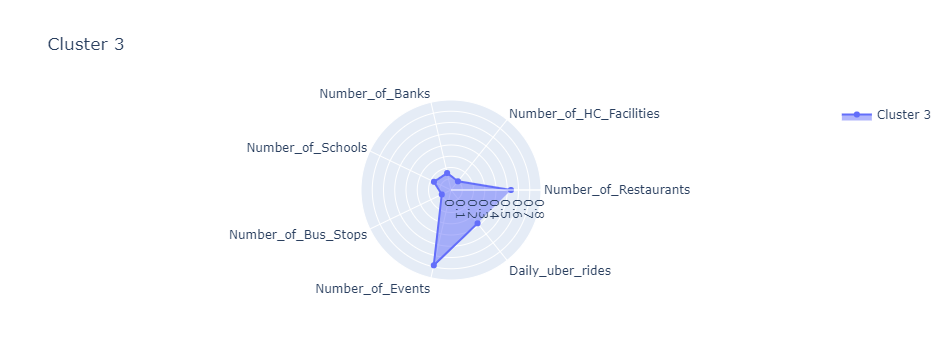

In [121]:
#Cluster 3 radar chart
categories = ['Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools',
 'Number_of_Bus_Stops','Number_of_Events', 'Daily_uber_rides']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=radar3_list,
      theta=categories,
      fill='toself',
      name='Cluster 3'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,0.8]
    )),
  showlegend=True,
  title=go.layout.Title(text='Cluster 3'))

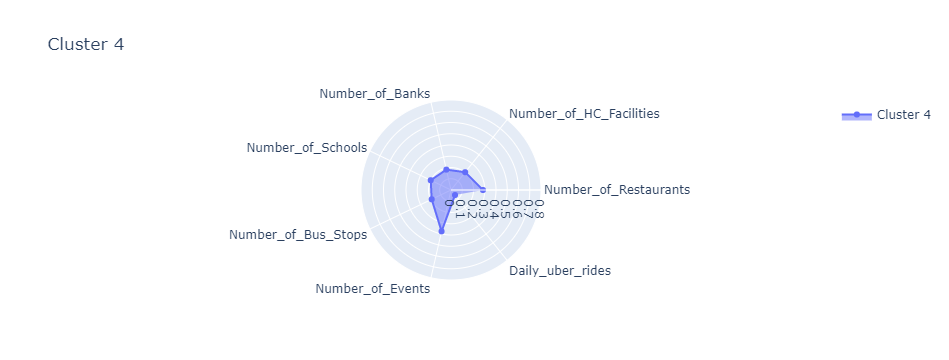

In [122]:
#Cluster 4 radar chart
categories = ['Number_of_Restaurants', 'Number_of_HC_Facilities', 'Number_of_Banks', 'Number_of_Schools',
 'Number_of_Bus_Stops','Number_of_Events', 'Daily_uber_rides']

fig = go.Figure()

fig.add_trace(go.Scatterpolar(
      r=radar4_list,
      theta=categories,
      fill='toself',
      name='Cluster 4'
))
fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0,0.8]
    )),
  showlegend=True,
  title=go.layout.Title(text='Cluster 4'))